# Introduction



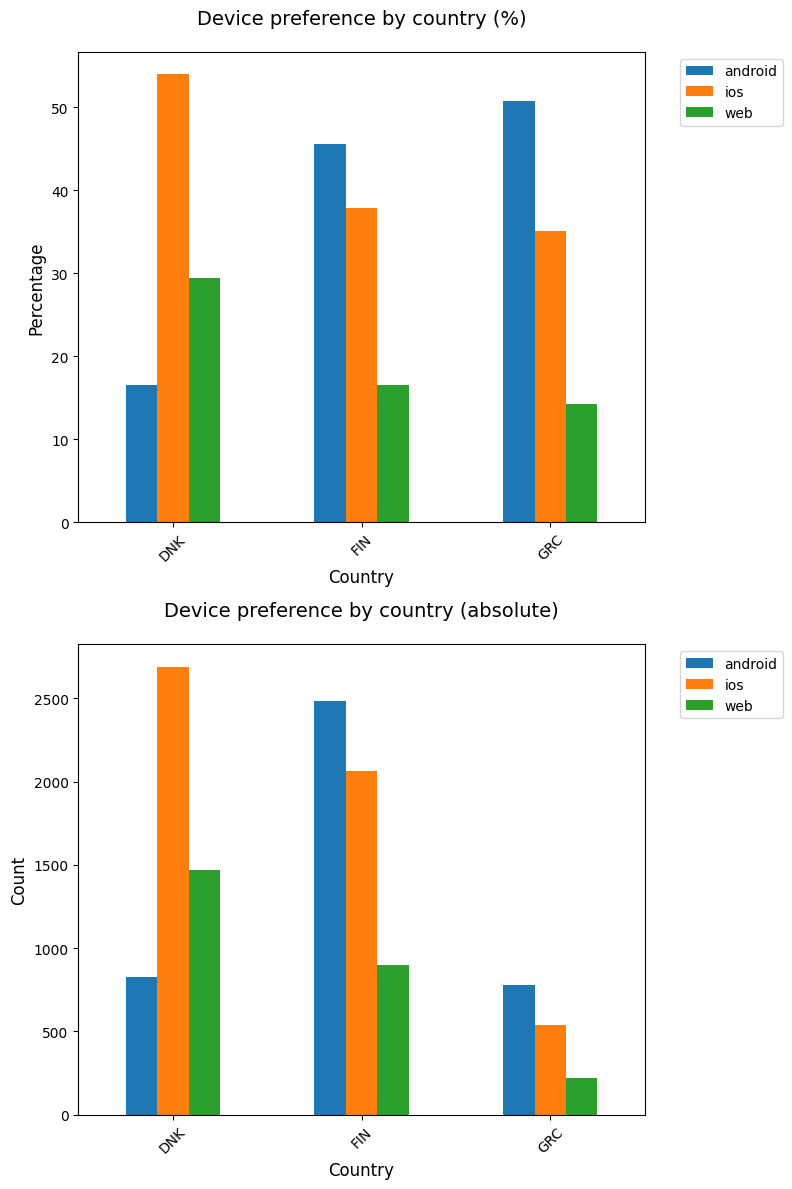

In [1]:
from osCountry import osPlot
from parsing import parseDf

# plot users OS by country
df = parseDf()
osPlot(df)

# Expenditure across platforms

One assumption would be that `web` users would not be spending as much as 



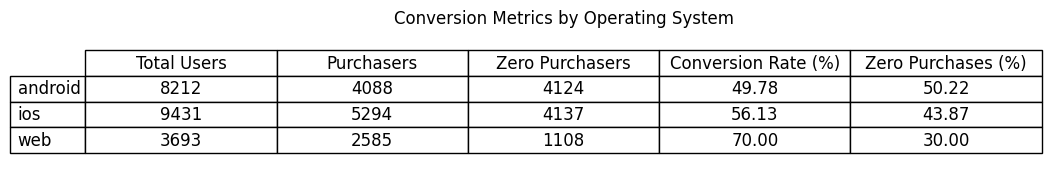

In [2]:
import pandas as pd
from parsing import sliceByCountry
from conversionOs import conversionByOs

df = pd.read_csv('dataset_for_datascience_assignment.csv')
df = sliceByCountry(df)
conversionByOs(df)

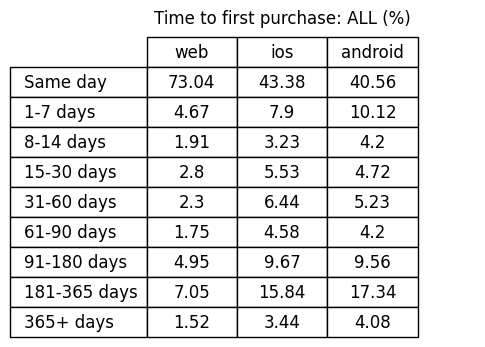

In [3]:
from firstPurchase import firstPurchase

# plot users OS by country
df = parseDf()
# firstPurchase(df, "FIN")
# firstPurchase(df, "GRC")
# firstPurchase(df, "DNK")
firstPurchase(df, "ALL")

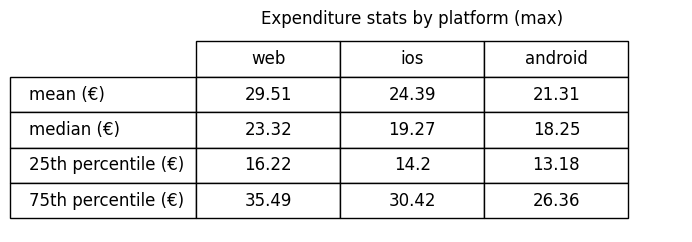

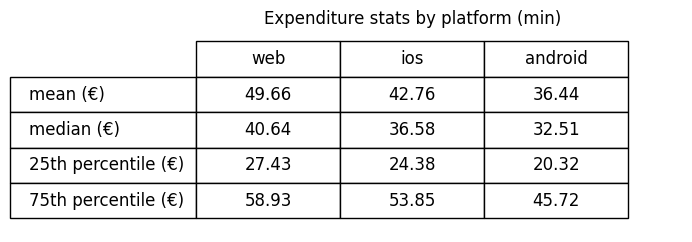

In [4]:
from osSpending import minMaxPurchase, plotPurchaseTable

df = parseDf()
maxDataFrame = minMaxPurchase(df, "min")
minDataFrame = minMaxPurchase(df, "max")
plotPurchaseTable(maxDataFrame, "(max)")
plotPurchaseTable(minDataFrame, "(min)")